## Bike Sharing Case Study

#### Problem Statement : 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company wants to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end so that the economy restores to a healthy state. 

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### Importing and Understanding Data

In [1440]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1441]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1442]:
#Importing dataset
boombikes = pd.read_csv('day.csv')
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1443]:
#Inspect the various aspects of the housing dataframe
print("Data types of the columns : ")
print("----------------------------")
print(boombikes.info()) #Checking the data types of the columns
print()
print("Number of rows x columns : ")
print("---------------------------")
print(boombikes.shape) #Prints total number of rows and columns
print()
print("Statistics pertaining to numerical columns : ")
print("---------------------------------------------")
print(boombikes.describe()) #Prints out the statistics pertaining to Numberical columns of the data frame.

Data types of the columns : 
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

Number of rows x columns : 
---------------------------
(730, 16)

Statistics pertaining to numerical columns : 
---------------------------------------------
          instant      season          yr        mnth     holiday     w

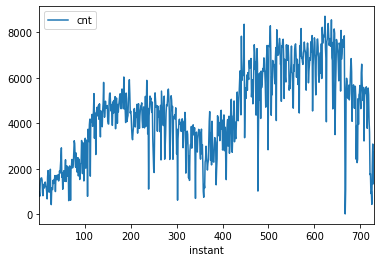

In [1444]:
#Line plot to understand the pattern of cnt change over the time
# instant vs cnt
boombikes.plot.line(x='instant', y='cnt')

In [1445]:
# REMOVING UNECESSARY COLUMNS : 

# Dropping "Instant" column as it is just a index column and doesn't seem to be contributing to any further data analysis
boombikes.drop('instant',axis=1,inplace=True)

# Dropping "dteday" column as it date column and we already have columns like month, yr,season which gives much more information about a day.
boombikes.drop('dteday',axis=1,inplace=True)

# Dropping "casual" and "registered" column as the value of these columns can be found only after a day and cannot be in hand for data prediction.
# "casual" and "registered" are therefore seems to be a kind of dependent variable and also the sum of both is equal to "cnt"
boombikes.drop('casual',axis=1,inplace=True)
boombikes.drop('registered',axis=1,inplace=True)

The Columns "temp" and "atemp" represent "temperature in Celsius" and "feeling temperature in Celsius" respectively.
There is not much difference between these two variables and are quite similar.
We can just keep any one of them for our calculation and predictions.
Here, We will keep temp.

In [1446]:
#Removing "atemp" column from the dataframe
boombikes.drop('atemp',axis=1,inplace=True)

In [1447]:
# Variables in dataframe after dropping unnecessary columns:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


###### Mapping the non ordinal values of categorical variables

The columns "season", "mnth", "weekday" and "weathersit" are categorical columns.
These are also non ordinal columns and hence having numbers as category for these can get confused with ordinal.
So, we can map these columns to the values which is actually representing the numbers for them. (Later it will help us while dummyfying the variables)

In [1448]:
# Mapping the values of "season" column 
season = ['spring','summer','fall','winter']
def season_map(x):
    x=x-1
    return season[x]

boombikes['season'] = boombikes['season'].apply(season_map)

In [1449]:
# Mapping the values of "mnth" column 
month = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
def month_map(x):
    x=x-1
    return month[x]

boombikes['mnth'] = boombikes['mnth'].apply(month_map)

In [1450]:
# Mapping the values of "weekday" column 
weekday = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
def weekday_map(x):
    x=x-1
    return weekday[x]

boombikes['weekday'] = boombikes['weekday'].apply(weekday_map)

In [1451]:
# Mapping the values of "weathersit" column 
weathersit = ['Clear','Mist + Cloudy','Light Snow + Rain','Heavy Rain + Snow + Fog']
def weathersit_map(x):
    x=x-1
    return weathersit[x]

boombikes['weathersit'] = boombikes['weathersit'].apply(weathersit_map)

### Data Visualisation

We can perform the bivariate analysis to understand the variation of 'cnt' according to other variables(both categorical and numerical)

In [1452]:
# weekday vs cnt
print(boombikes.groupby('weekday')['cnt'].mean())
print()
# mnth vs cnt
print(boombikes.groupby('mnth')['cnt'].mean())
print()

weekday
Friday       4550.542857
Monday       4510.663462
Saturday     4228.828571
Sunday       4338.123810
Thursday     4690.288462
Tuesday      4574.893204
Wednesday    4667.259615
Name: cnt, dtype: float64

mnth
April    4484.900000
Aug      5664.419355
Dec      3403.806452
Feb      2669.964286
Jan      2176.338710
July     5563.677419
June     5772.366667
Mar      3692.258065
May      5349.774194
Nov      4247.183333
Oct      5199.225806
Sept     5766.516667
Name: cnt, dtype: float64



In this we see that on weekday Thursday and in the month June, the count in the number of people renting the bikes are large.

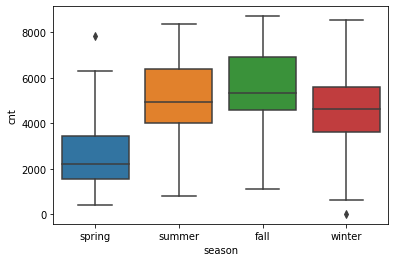

In [1453]:
# season vs cnt
sns.boxplot(boombikes['season'],boombikes['cnt'])

From the above plot we see that the mean of the fall season is high for cnt i.e more people like to hire bikes during fall.
We can also see that there are few outliers in spring and winter season.

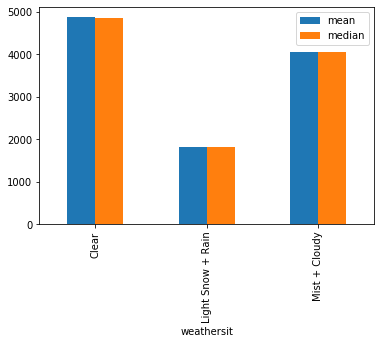

In [1454]:
# weathersit vs cnt
boombikes.groupby('weathersit')['cnt'].agg(['mean','median']).plot.bar()

From the above bar graph, we see that the in clear sky, people tend to rent more bikes. And also, the mean and median for the categories of weathersit is similar, hence we can say that there no outliers in them.

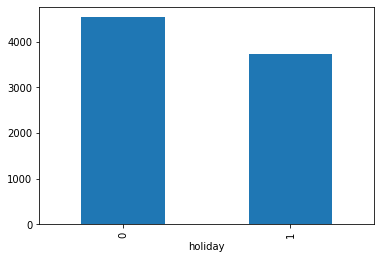

In [1455]:
# weathersit vs cnt
boombikes.groupby('holiday')['cnt'].mean().plot.bar()

From above bar plot of holiday and cnt, we can say that people tend to hire more bikes on non holiday days rather than on Holiday.

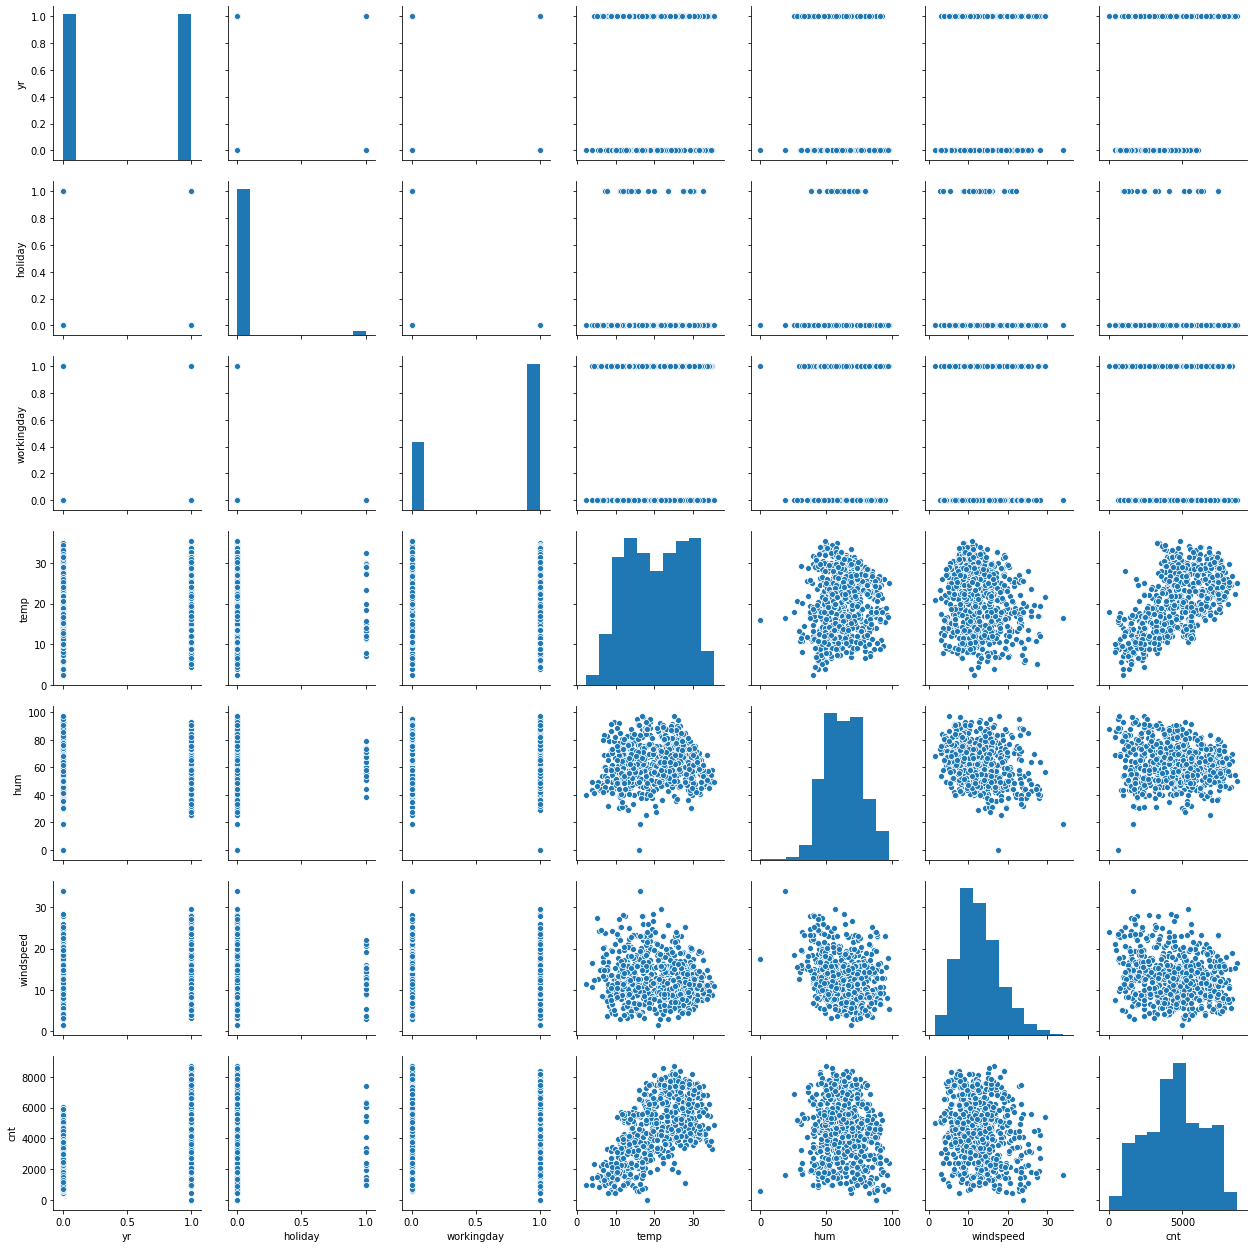

In [1456]:
#plot the pairplot between numerical variables of the boombikes
sns.pairplot(boombikes)
plt.show()

From the above pair plot we can see only temp variable tends to correlate a little linearly with cnt.

###### Correlation between the variables of boombikes data frame

In [1457]:
# Let's check the correlation coefficients to see which variables are highly correlated

corr = boombikes.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corrdf_1 = corr.unstack().reset_index()
corrdf_1.columns=['Variable1','Variable2','Correlation']
corrdf_1.dropna(subset=['Correlation'],inplace=True)
corrdf_1.Correlation = round(abs(corrdf_1['Correlation']),4)
corrdf_1.sort_values(by='Correlation', ascending=False)

,Variable1,Variable2,Correlation
45,cnt,temp,0.6270
42,cnt,yr,0.5697
15,workingday,holiday,0.2529
39,windspeed,hum,0.2485
47,cnt,windspeed,0.2351
38,windspeed,temp,0.1582
31,hum,temp,0.1286
28,hum,yr,0.1125
46,cnt,hum,0.0985
43,cnt,holiday,0.0688


From the above correlation table, we can see that the cnt and temp variables are highly correlated. And cnt and workingday are least correlated.

### Data Preparation

###### Dummy Variables

We can convert the categorical into numerical in a non ordinal manner to make the linear regression efficient.
We can use get_dummies function of pandas or we can also use one hot coding as well.
Here, we will use get_dummies

In [1458]:
# Creating dummy variables for Season
season = pd.get_dummies(boombikes['season'],drop_first=True)

#Adding dummy variables to the dataframe
boombikes = pd.concat([boombikes, season], axis = 1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Friday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Sunday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Monday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Tuesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


Now here, we can interprete that : 

* `100` will correspond to `spring`
* `010` will correspond to `summer`
* `001` will correspond to `winter`
* `000` will correspond to `fall`

Likewise, we can do the dummification of `mnth`, `weekday` and `weathersit`

In [1459]:
# Creating dummy variables for mnth
month = pd.get_dummies(boombikes['mnth'],drop_first=True)

#Adding dummy variables to the dataframe
boombikes = pd.concat([boombikes, month], axis = 1)

# Creating dummy variables for weekday
weekday = pd.get_dummies(boombikes['weekday'],drop_first=True)

#Adding dummy variables to the dataframe
boombikes = pd.concat([boombikes, weekday], axis = 1)

# Creating dummy variables for weathersit
weathersit = pd.get_dummies(boombikes['weathersit'],drop_first=True)

#Adding dummy variables to the dataframe
boombikes = pd.concat([boombikes, weathersit], axis = 1)

In [1460]:
#We can now drop the columns season, mnth, weekday and weathersit

columns = ['season', 'mnth', 'weekday', 'weathersit']

boombikes.drop(columns,axis=1,inplace=True)
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow + Rain,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


###### Splitting the data into Train and Test sets

In [1461]:
# The first basic step for regression is performing a train-test split.
# Import library sklearn for performing the steps in linear regression.

from sklearn.model_selection import train_test_split

# We specify seed, so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Scaling the variables
As it can be seen in the datframe, that the values of all the variables are not in same scale, so the coeffcients seems to vary alot for small scale and large scale variables.

To overcome this, we scale the numeric columns of the dataframe
We can use MinMax or Standardisation methods to scale the variables.

In [1462]:
from sklearn.preprocessing import MinMaxScaler #Library used for MinMax

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [1463]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow + Rain,Mist + Cloudy
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,1,0,0,0,0,0,0,0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [1464]:
df_train.describe() #To check the statistical operations on numeric variables of the train set

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow + Rain,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.131373,0.143137,0.150980,0.127451,0.158824,0.133333,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.338139,0.350557,0.358381,0.333805,0.365870,0.340268,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Dividing into X and Y sets for the model building

In [1465]:
y_train = df_train.pop('cnt')
X_train = df_train

### Data Modelling

Here we will use `RFE(Recursive Feature Elimination)` approach to first identify the top 15 variables and then drill down using statsmodel to come to final set of variables.

In [1466]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1467]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train) # Fisrt fit all the collumns into the model

rfe = RFE(lm, 15)             # running RFE by passing the model with the number of variables requirred.
rfe = rfe.fit(X_train, y_train)

In [1468]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # To check the columns which RFE has selected

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 10),
 ('Tuesday', False, 8),
 ('Wednesday', False, 7),
 ('Light Snow + Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

Here, the columns with rfe ranking as 1 are the ones which RFE has selected as top 15 and rest of the ranking increases as the correlation of that variable to target variable decreases.

In [1469]:
col = X_train.columns[rfe.support_] # The column ssupported by RFE
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'July', 'Nov', 'Sept', 'Saturday', 'Light Snow + Rain',
       'Mist + Cloudy'],
      dtype='object')

In [1470]:
# The columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

###### Building model using statsmodel, for the detailed statistics

In [1471]:
# Creating X_train dataframe with RFE selected variables (Filtering out the rest of the columns)
X_train_rfe = X_train[col]

In [1472]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

###### Model 1

In [1473]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model - lm1

In [1474]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.16e-191
Time:                        19:31:54   Log-Likelihood:                 520.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3045      0.03

`Nov` is insignificant in presence of other variables as the p-value of the varibale is very high; can be dropped

In [1475]:
X_train_new = X_train_rfe.drop(["Nov"], axis = 1) #dropping the Nov variable

In [1476]:
#Rebuilding the model after removing "Nov" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model - lm1

In [1477]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.45e-192
Time:                        19:31:57   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -945.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2972      0.03

Here, from the summary we can see that the `R-squared` is dropped from 0.849 to 0.848 which is not that much of a drop and `Adjusted R-squared` has remained same even after removing `"Nov"` variable. Also, we can see that the F-statistic of the model has improved.

We can also see from the summary that the p-value for `Jan` is 0.05, We can remove this variable and see how it affects the model as any variable with p-value less than 0.05 is considered.

In [1478]:
X_train_new = X_train_new.drop(['Jan'], axis=1)

In [1479]:
#Rebuilding the model after removing "Jan" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new) #for model lm1

lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model for lm1

#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-192
Time:                        19:32:00   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2852      0.03

From the above summary, we can see that the p-value for `spring` and `July` variables are higher than that of the other variables. However, it is not of a concern, but we can form a new model after dropping these variables as our aim is also to keep variable count<= 10 for a better model along with finding a best fit line.

Hence we will drop `spring` and `july` one by one and form a new model and check the variance in the `R-squared` and `Adjusted R-squared`

###### Model 2

In [1480]:
# Dropping Spring first
X_train_new1 = X_train_new.drop(['spring'], axis=1)

In [1481]:
#Rebuilding the model after removing "spring" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1) 

lm2 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model for lm2

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.66e-192
Time:                        19:32:03   Log-Likelihood:                 513.75
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2277      0.02

The difference between the `R-squared ` and `Adjusted R-squared` remains same.

In [1482]:
# Dropping July variable
X_train_new1 = X_train_new1.drop(['July'], axis=1)

In [1483]:
#Rebuilding the model after removing "July" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1) 

lm2 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model for lm2

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.02e-192
Time:                        19:32:05   Log-Likelihood:                 510.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     498   BIC:                            -946.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2277      0.02

The value of both `R-squared` and `Adjusted R-squared` have become 0.84 approx. The model 2 seems like a stable model.

However, we can still further check the multicollinearity between the variables if any on both the models

###### `VIF` for `Model 1`

In [1484]:
X_train_new = X_train_new.drop(['const'], axis=1) #dropping const as it is intercept

Calculating the VIF of the variables to check the multicollinearity

In [1485]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
12,Mist + Cloudy,2.30
0,yr,2.08
8,July,1.59
9,Sept,1.39


###### `VIF` for `Model 2`

In [1486]:
X_train_new1 = X_train_new1.drop(['const'], axis=1) #dropping const as it is intercept

In [1487]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.54
2,temp,8.01
4,windspeed,3.56
10,Mist + Cloudy,2.13
0,yr,2.01
6,winter,1.66
5,summer,1.58
7,Sept,1.21
8,Saturday,1.19
9,Light Snow + Rain,1.17


From the above listed VIF of the variables in both the `model 1` and `model 2`, we can see that the VIF for `temp` and `hum` variables are high. We can first `drop hum from model 2` and see how it is affecting the model.

In [1488]:
X_train_new1 = X_train_new1.drop(['hum'], axis=1)

In [1489]:
#Rebuilding the model after removing "hum" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1)

lm2 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model- lm2

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.88e-189
Time:                        19:32:13   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1350      0.01

The `R-squared` and `Adjusted R-squared` values are not having large dip in the value after removing `hum` variable. We can now further check the VIF of `temp` after removing `hum`

In [1490]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,yr,2.00
4,summer,1.56
9,Mist + Cloudy,1.48
5,winter,1.39
6,Sept,1.21
7,Saturday,1.16
8,Light Snow + Rain,1.08
1,holiday,1.04


From the above VIF table, we can see that after removing the `hum` variable, the VIF for `temp` has decreased.
The model seems to have become stable from all aspects.

Even though we have got a stable model, we can still try to remove few more features as far as the `R-squared` and `Adjusted R-squared` don't vary alot from each other.

We can now build one more model by removing features from Model 2. We will try to remove the features randomply and see how a model is getting efficient with less features.


###### Model 3

In [1491]:
# Remove holiday variable and checking the model :

X_train_new2 = X_train_new1.drop(['holiday'], axis=1)

In [1492]:
#Rebuilding the model after removing "holiday" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

lm3 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model- lm3

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     273.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.01e-187
Time:                        19:32:18   Log-Likelihood:                 492.30
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     500   BIC:                            -922.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1289      0.01

The values of `R-squared` and `Adjusted R-squared` are seen to be not varying much with 0.83 each.
We can now try to remove either `windspeed`.

In [1493]:
# Remove windspeed variable and checking the model :

X_train_new2 = X_train_new2.drop(['windspeed'], axis=1)

In [1494]:
#Rebuilding the model after removing "windspeed" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

lm3 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model- lm3

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.85e-180
Time:                        19:32:22   Log-Likelihood:                 473.81
No. Observations:                 510   AIC:                            -929.6
Df Residuals:                     501   BIC:                            -891.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0650      0.01

In [1495]:
# Remove Saturday variable and checking the model :

X_train_new2 = X_train_new2.drop(['Saturday'], axis=1)

In [1496]:
#Rebuilding the model after removing "Saturday" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

lm3 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model- lm3

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.91e-178
Time:                        19:32:25   Log-Likelihood:                 466.55
No. Observations:                 510   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -883.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0575      0.01

Check VIF of the Model 3 after removing the above variables.

In [1497]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.85
0,yr,1.94
2,summer,1.51
6,Mist + Cloudy,1.43
3,winter,1.33
4,Sept,1.19
5,Light Snow + Rain,1.06


We see that after removing `holiday`,`windspeed` and `Saturday`, the VIF of the variables have also improved and all of them are under 5.

We can see that the value of `R-squared` and `Adjusted R-squared` are similar with 0.81. We have actually got a very significant model with much reduced features.

This can be considered a nice model, but further we can also try to remove features and see how it is effecting further.

We can also try and remove other features and see if there is any difference in the model instead of `holiday`,`windspeed`,`Saturday`.

We will try to remove `holiday`,`Sept`and `Saturday` from Model 2 and see what is the difference.


###### Model 4

In [1498]:
# Remove holiday variable and checking the model :

X_train_new3 = X_train_new1.drop(['holiday'], axis=1)

#Rebuilding the model after removing "holiday" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new3)

lm4 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model- lm4

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     273.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.01e-187
Time:                        19:32:29   Log-Likelihood:                 492.30
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     500   BIC:                            -922.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1289      0.01

In [1499]:
# Remove Sept variable and checking the model :

X_train_new3 = X_train_new3.drop(['Sept'], axis=1)

#Rebuilding the model after removing "Sept" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new3)

lm4 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model- lm4

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.41e-180
Time:                        19:32:35   Log-Likelihood:                 474.53
No. Observations:                 510   AIC:                            -931.1
Df Residuals:                     501   BIC:                            -893.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1290      0.01

In [1500]:
# Remove Saturday variable and checking the model :

X_train_new3 = X_train_new3.drop(['Saturday'], axis=1)

#Rebuilding the model after removing "Saturday" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new3)

lm4 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model- lm4

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.92e-178
Time:                        19:32:38   Log-Likelihood:                 466.55
No. Observations:                 510   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -883.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1211      0.01

Here, we see that both Model 3 and Model 4 are having same `R-squared` and `Adjusted R-squared` i.e. `0.813` and `0.811` respectively. We can either keep Model 3 or Model 4 based on the prediction power calculated on test data. 

We can also try and remove more features and see if it is holding the Model stable. We will remove `Sept` from Model 3 and see how it is affecting it.

###### Model 5

In [1369]:
# Remove Sept variable and checking the model :

X_train_new4 = X_train_new2.drop(['Sept'], axis=1)


In [1370]:
#Rebuilding the model after removing "Sept" variable

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new4)

lm5 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model- lm4

#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     333.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.31e-171
Time:                        18:09:26   Log-Likelihood:                 447.52
No. Observations:                 510   AIC:                            -881.0
Df Residuals:                     503   BIC:                            -851.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0527      0.01

We can now see that the value for `R-squared` has dropped significantly after removing `Sept`. Hence, we will limit our feature selection to thrid model.

Now, we have four models with a very significant `R-squared` and `Adjusted R-squared` in all of them.
We can further check evaluate both the models and see if it can narrow down our search for best fit model.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

###### Model 1

In [1371]:
y_train_cnt = lm1.predict(X_train_lm) # predicting Y based on Model 1

Text(0.5, 0, 'Errors')

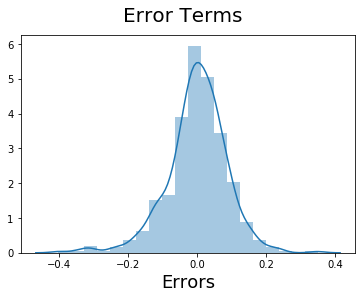

In [1372]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

###### Model 2

In [1373]:
y_train_cnt1 = lm2.predict(X_train_lm1) # predicting Y based on Model 2

Text(0.5, 0, 'Errors')

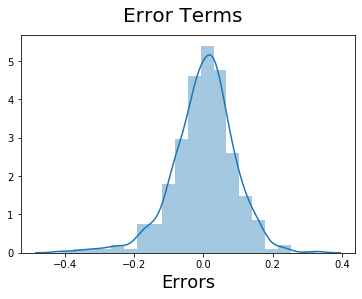

In [1374]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

###### Model 3

In [1375]:
y_train_cnt2 = lm3.predict(X_train_lm2) # predicting Y based on Model 3

Text(0.5, 0, 'Errors')

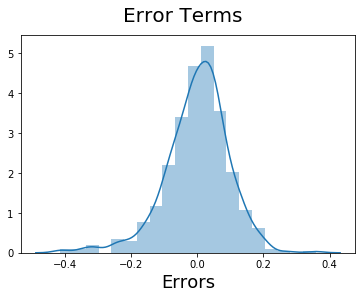

In [1376]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

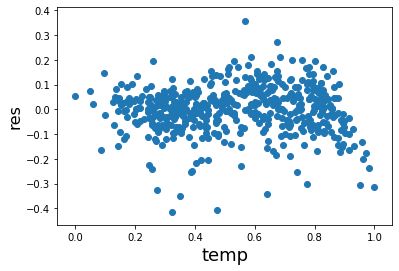

In [1428]:
# Checking if the error terms follow any pattern  - one of the assumptions
res = y_train-y_train_cnt2

plt.scatter(X_train_lm2['temp'],res)
plt.xlabel('temp', fontsize=18)                          # X-label
plt.ylabel('res', fontsize=16)    
plt.show()

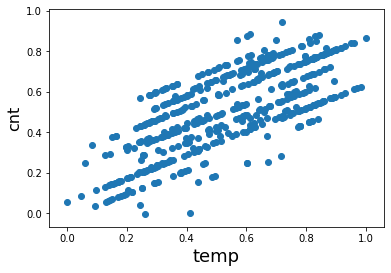

In [1426]:
#Checking if the x and y are linear to each other - one of the assumptions
plt.scatter(X_train_lm2['temp'],y_train_cnt2)
plt.xlabel('temp', fontsize=18)                          # X-label
plt.ylabel('cnt', fontsize=16)    
plt.show()

###### Model 4

In [1377]:
y_train_cnt3 = lm4.predict(X_train_lm3) # predicting Y based on Model 4

Text(0.5, 0, 'Errors')

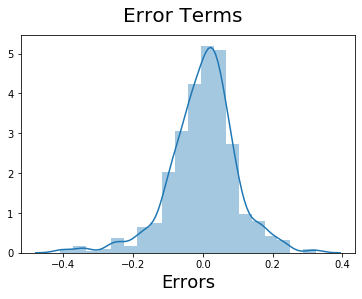

In [1378]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt3), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

From the above represented histogram plot of both model 1,2,3 and 4, we see that all the models show normality in the residual i.e mean 0 and variance same accross them.
However, we see that there is a little bump in the intial tail between -0.4 and -0.2 in model 1 and model 3 and Model 4 which is not present in model 2.

### Making Predictions and Evaluation

###### Applying the scaling on the test sets 

In [1379]:
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

###### Dividing into X_test and y_test

In [1380]:
y_test = df_test.pop('cnt')
X_test = df_test

###### Now let's use our models to make predictions.

###### Model 1

In [1381]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1382]:
# Making predictions
y_pred = lm1.predict(X_test_new)

Text(0, 0.5, 'y_pred')

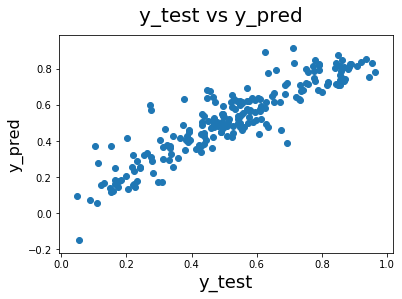

In [1383]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

In [1384]:
# Predicted R-Squared for model 1

from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),3)

0.816

###### Model 2 

In [1385]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)

In [1386]:
# Making predictions
y_pred1 = lm2.predict(X_test_new1)

Text(0, 0.5, 'y_pred1')

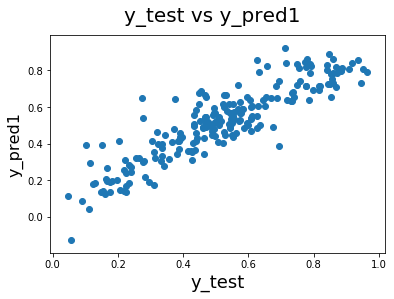

In [1387]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred1', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred1', fontsize=16)     

In [1388]:
# Predicted R-Squared for model 2
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred1),3)

0.796

###### Model 3

In [1389]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new2 = X_test[X_train_new2.columns]

# Adding a constant variable 
X_test_new2 = sm.add_constant(X_test_new2)

In [1390]:
# Making predictions
y_pred2 = lm3.predict(X_test_new2)

Text(0, 0.5, 'y_pred2')

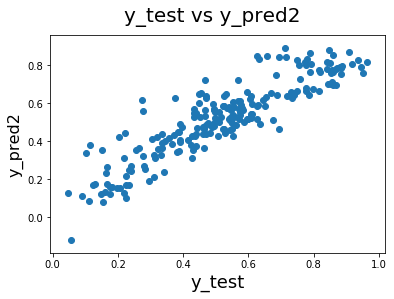

In [1391]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred2', fontsize=16)   

In [1392]:
# Predicted R-Squared for model 3
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred2),3)

0.796

###### Model 4

In [1393]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new3 = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new3 = sm.add_constant(X_test_new3)

In [1394]:
# Making predictions
y_pred3 = lm4.predict(X_test_new3)

Text(0, 0.5, 'y_pred3')

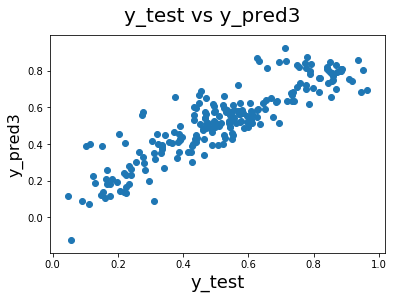

In [1395]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred3)
fig.suptitle('y_test vs y_pred3', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred3', fontsize=16)   

In [1396]:
# Predicted R-Squared for model 3
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred3),3)

0.782

The predicting power of the both the models are quite close and both of them are giving linear predicted graph and giving nest fit line as linear.<br>

Model 1 has :<br>
`Train R-squared : 0.847`<br>
`Adj. R-squared : 0.843`<br>
`predicted R-Squared : 0.82` 

Model 2 has :<br>
`Train R-squared : 0.837`<br>
`Adj. R-squared : 0.834`<br>
`predicted R-Squared : 0.796` 

Model 3 has :<br>
`Train R-squared : 0.813`<br>
`Adj. R-squared : 0.811`<br>
`predicted R-Squared : 0.796` 

Model 4 has :<br>
`Train R-squared : 0.813`<br>
`Adj. R-squared : 0.811`<br>
`predicted R-Squared : 0.782` 


Now, we need to decide which model to use as both of them have good performance and prediction power. 

We will here now compare the number of variables used in both of them. Model 1 has 13 variables while Model 2 has 10 variables and Model 3 and Model 4 has 7 variables each.

Since the Model 3 and 4 have same number of features, we will select Model 3 as it is having better prediction power than that of Model 4.

So, out of Model 2 and 3, we see that both of them have same prediction power i.e. 0.796. So, we will select Model 3 as it is capable of predicting same as that of Model 2 but with less number of features. 

We tend to incline towards the model which gives best fit line along with considerable number of variables.

Hence, Among these Model 1 and Model 3, we will choose Model 3 as our final Model even though the prediction power is little less than that Model 2 because it is having <10 variables which accounts to be a base for good model.

###### Final Model :

`predicted R-Squared     : 0.80` <br>
`Variables in the Model  : `<br>
`'yr', 'temp', 'summer', 'winter', 'Sept','Light Snow + Rain', 'Mist + Cloudy'`


#### Recomendation : 

1. The variables `'yr', 'temp', 'summer', 'winter', 'Sept','Light Snow + Rain', 'Mist + Cloudy'` are significant in predicting the demands of the shared bikes.
2. We can explain how well the selected variables describe the demands of shared bikes by deriving the below Linear Equation :

$ cnt = (0.232  \times  yr)  + (0.578 \times temp) + (0.083 \times summer) + (0.137\times winter) + (0.105\times Sept) - (0.295 \times Light Snow + Rain) - (0.076 \times Mist + Cloudy) $

So, from the linear equation we can recomend that : <br>
1. With every one unit increase in `yr`, the cnt increases by `0.232`
2. With every one unit increase in `temp`, the cnt increases by `0.578`
3. When season `summer` arrives, the cnt increases by `0.083`
4. When season `winter`arrives, the cnt increases by `0.137`
5. During `Sept` month, the cnt increases by `0.105`
6. When weather is `Light Snow + Rain`, the cnt decreases by `0.295`
7. When weather is `Mist + Cloudy`, the cnt decreases by `0.076`